# Gradient Descent With Momentum M = 1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[14.03265433]
 [ 8.58689802]
 [-5.43292964]
 [-3.13364384]]
Số vòng lặp thực hiện: 248
Giá trị hàm mất mát cuối cùng: 3.1682147024978703e-12


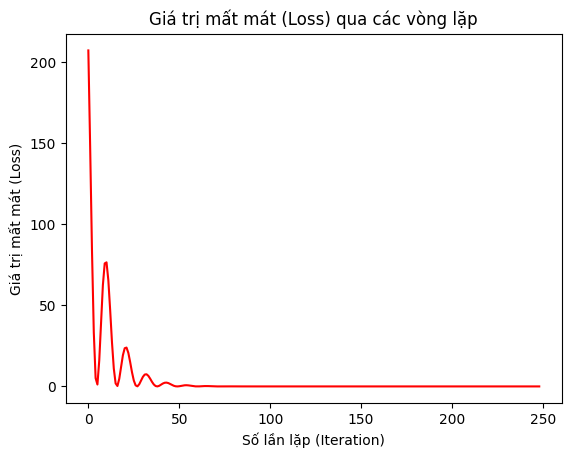

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 8.813855462097385


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 1
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
def myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    v = np.zeros_like(w_init)  # Vector động lượng ban đầu (giá trị 0)
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        v = beta * v + alpha * grad_current  # Cập nhật động lượng
        w_new = w[-1] - v  # Cập nhật trọng số bằng động lượng

        loss = loss_function(Xbar,w_new,y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad(w_new)) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 10000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Gradient Descent With Momentum M = 150

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[15.26039152]
 [16.2624844 ]
 [29.6762549 ]
 [ 1.31976829]]
Số vòng lặp thực hiện: 9846
Giá trị hàm mất mát cuối cùng: 1.227199770866032


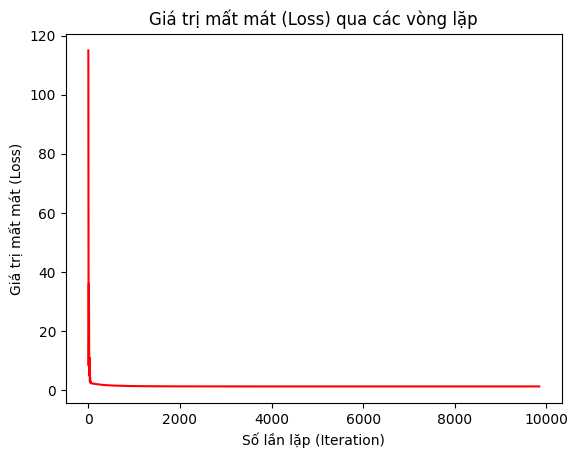

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 1.7810235608833507


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 150
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
def myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    v = np.zeros_like(w_init)  # Vector động lượng ban đầu (giá trị 0)
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        v = beta * v + alpha * grad_current  # Cập nhật động lượng
        w_new = w[-1] - v  # Cập nhật trọng số bằng động lượng

        loss = loss_function(Xbar,w_new,y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad(w_new)) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 10000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Gradient Descent With Momentum M = 20

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[13.35562081]
 [15.81049896]
 [14.13520943]
 [ 4.28497672]]
Số vòng lặp thực hiện: 9999
Giá trị hàm mất mát cuối cùng: 0.9910413092692884


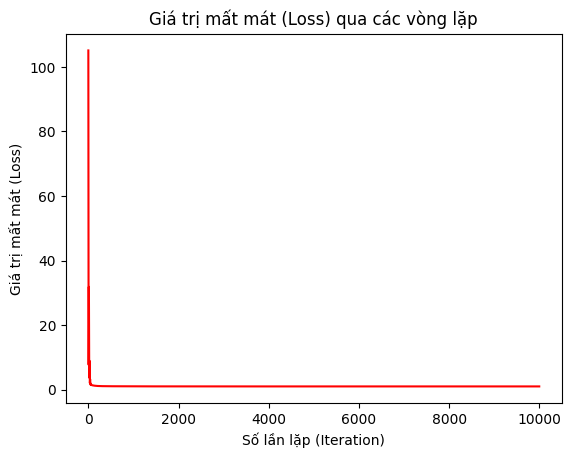

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 1.7698531990834725


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 20
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
def myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    v = np.zeros_like(w_init)  # Vector động lượng ban đầu (giá trị 0)
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        v = beta * v + alpha * grad_current  # Cập nhật động lượng
        w_new = w[-1] - v  # Cập nhật trọng số bằng động lượng

        loss = loss_function(Xbar,w_new,y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad(w_new)) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 10000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = myGradientDescentWithMomentum(w_init, grad, loss_function, alpha, beta, loop)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Batch Gradient Descent M = 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[12.39137702]
 [10.67492393]
 [-0.23304066]
 [ 0.57159037]]
Giá trị hàm mất mát cuối cùng: 7.994079838821096


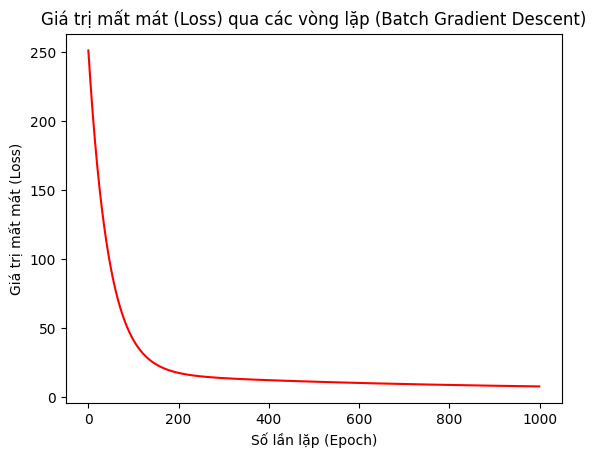

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 3.979564539261821


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive

# Tải dữ liệu từ Google Drive
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls

# Đọc dữ liệu từ file CSV
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Chọn số lượng điểm dữ liệu
M = 1  # Sử dụng toàn bộ dữ liệu trong tệp
X = data[:, 0:3]  # Chọn các biến đầu vào (TV, Radio, Newspaper)
y = data[:, 3:4]  # Chọn biến đầu ra (Sales)

# Chuẩn hóa dữ liệu
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu

# Thêm cột bias vào X
X_b = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

# Hàm Batch Gradient Descent

def batch_gradient_descent():
    epochs_max = 1000
    learning_rate = 0.005

    # Khởi tạo các trọng số ngẫu nhiên (4 tham số, bao gồm 1 bias)
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]  # Lưu đường đi của các trọng số
    losses = []  # Lưu giá trị hàm mất mát

    for i in range(epochs_max):
        # Dự đoán y_hat
        y_hat = X_b.dot(thetas)

        # Tính toán mất mát (loss)
        loss = (y_hat - y) ** 2

        # Tính gradient cho mất mát
        d_loss = 2 * (y_hat - y) / N

        # Tính gradient cho các tham số
        gradients = X_b.T.dot(d_loss)

        # Cập nhật các tham số
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        # Tính toán giá trị mất mát trung bình
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

# Chạy thuật toán Batch Gradient Descent
thetas_path, losses = batch_gradient_descent()

# In ra trọng số cuối cùng
print(f"Trọng số cuối cùng: {thetas_path[-1]}")
# print(f"Số lượng vòng lặp: {len(thetas_path)}")
print(f"Giá trị hàm mất mát cuối cùng: {losses[-1]}")

# Biểu diễn giá trị mất mát qua các vòng lặp
plt.plot(losses, 'r-')
plt.xlabel('Số lần lặp (Epoch)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp (Batch Gradient Descent)')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,thetas_path[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Batch Gradient Descent M = 150


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[12.39137702]
 [10.67492393]
 [-0.23304066]
 [ 0.57159037]]
Giá trị hàm mất mát cuối cùng: 7.994079838821096


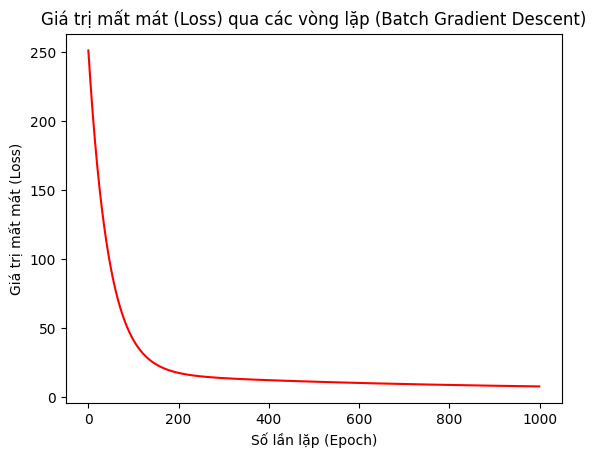

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 4.361719224298295


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive

# Tải dữ liệu từ Google Drive
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls

# Đọc dữ liệu từ file CSV
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Chọn số lượng điểm dữ liệu
M = 150  # Sử dụng toàn bộ dữ liệu trong tệp
X = data[:, 0:3]  # Chọn các biến đầu vào (TV, Radio, Newspaper)
y = data[:, 3:4]  # Chọn biến đầu ra (Sales)

# Chuẩn hóa dữ liệu
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu

# Thêm cột bias vào X
X_b = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

# Hàm Batch Gradient Descent

def batch_gradient_descent():
    epochs_max = 1000
    learning_rate = 0.005

    # Khởi tạo các trọng số ngẫu nhiên (4 tham số, bao gồm 1 bias)
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]  # Lưu đường đi của các trọng số
    losses = []  # Lưu giá trị hàm mất mát

    for i in range(epochs_max):
        # Dự đoán y_hat
        y_hat = X_b.dot(thetas)

        # Tính toán mất mát (loss)
        loss = (y_hat - y) ** 2

        # Tính gradient cho mất mát
        d_loss = 2 * (y_hat - y) / N

        # Tính gradient cho các tham số
        gradients = X_b.T.dot(d_loss)

        # Cập nhật các tham số
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        # Tính toán giá trị mất mát trung bình
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

# Chạy thuật toán Batch Gradient Descent
thetas_path, losses = batch_gradient_descent()

# In ra trọng số cuối cùng
print(f"Trọng số cuối cùng: {thetas_path[-1]}")
# print(f"Số lượng vòng lặp: {len(thetas_path)}")
print(f"Giá trị hàm mất mát cuối cùng: {losses[-1]}")

# Biểu diễn giá trị mất mát qua các vòng lặp
plt.plot(losses, 'r-')
plt.xlabel('Số lần lặp (Epoch)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp (Batch Gradient Descent)')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,thetas_path[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Batch Gradient Descent M = 20

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[12.39137702]
 [10.67492393]
 [-0.23304066]
 [ 0.57159037]]
Giá trị hàm mất mát cuối cùng: 7.994079838821096


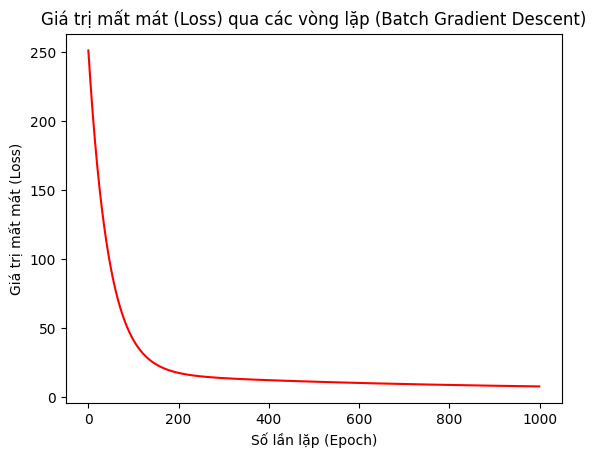

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 4.1081155224720955


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive

# Tải dữ liệu từ Google Drive
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls

# Đọc dữ liệu từ file CSV
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Chọn số lượng điểm dữ liệu
M = 20  # Sử dụng toàn bộ dữ liệu trong tệp
X = data[:, 0:3]  # Chọn các biến đầu vào (TV, Radio, Newspaper)
y = data[:, 3:4]  # Chọn biến đầu ra (Sales)

# Chuẩn hóa dữ liệu
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu

# Thêm cột bias vào X
X_b = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

# Hàm Batch Gradient Descent

def batch_gradient_descent():
    epochs_max = 1000
    learning_rate = 0.005

    # Khởi tạo các trọng số ngẫu nhiên (4 tham số, bao gồm 1 bias)
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]  # Lưu đường đi của các trọng số
    losses = []  # Lưu giá trị hàm mất mát

    for i in range(epochs_max):
        # Dự đoán y_hat
        y_hat = X_b.dot(thetas)

        # Tính toán mất mát (loss)
        loss = (y_hat - y) ** 2

        # Tính gradient cho mất mát
        d_loss = 2 * (y_hat - y) / N

        # Tính gradient cho các tham số
        gradients = X_b.T.dot(d_loss)

        # Cập nhật các tham số
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        # Tính toán giá trị mất mát trung bình
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses

# Chạy thuật toán Batch Gradient Descent
thetas_path, losses = batch_gradient_descent()

# In ra trọng số cuối cùng
print(f"Trọng số cuối cùng: {thetas_path[-1]}")
# print(f"Số lượng vòng lặp: {len(thetas_path)}")
print(f"Giá trị hàm mất mát cuối cùng: {losses[-1]}")

# Biểu diễn giá trị mất mát qua các vòng lặp
plt.plot(losses, 'r-')
plt.xlabel('Số lần lặp (Epoch)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp (Batch Gradient Descent)')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,thetas_path[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Gradient Descent M = 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[14.03265902]
 [ 8.58690089]
 [-5.43293146]
 [-3.13364489]]
Số vòng lặp thực hiện: 192
Giá trị hàm mất mát cuối cùng: 4.287732809507472e-12


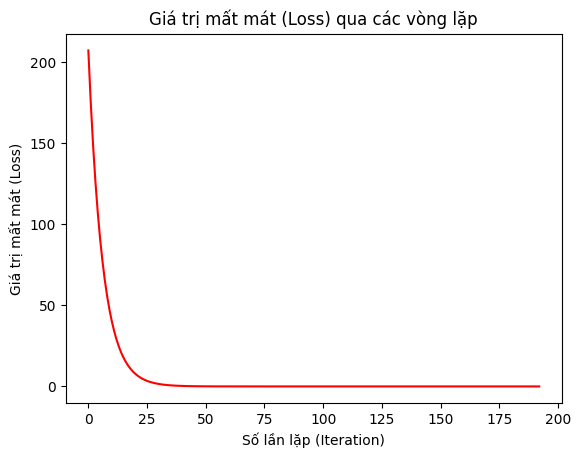

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 8.813868107482818


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 1
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss


# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 1000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = gradient_descent(w_init, grad, loss_function, alpha)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Gradient Descent M = 150

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[11.29913304]
 [16.3853551 ]
 [ 2.23023343]
 [ 1.19521444]]
Số vòng lặp thực hiện: 999
Giá trị hàm mất mát cuối cùng: 2.156253173214929


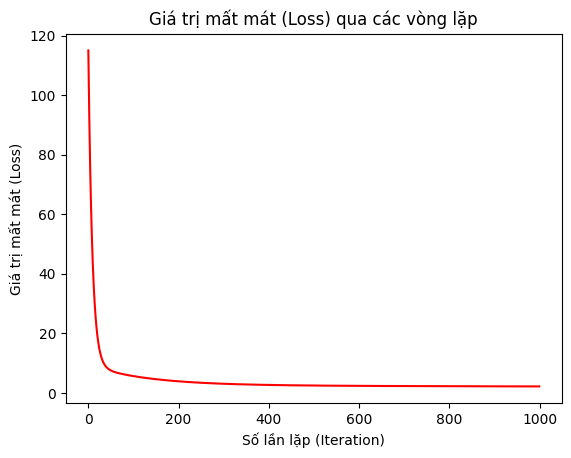

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 3.238880841842592


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 150
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss


# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 1000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = gradient_descent(w_init, grad, loss_function, alpha)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")

# Gradient Descent M = 20

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Database_ML_AI
advertising.csv  Selected_Data.csv
Trọng số cuối cùng: [[11.67269652]
 [15.61374025]
 [ 1.15880863]
 [ 3.16507435]]
Số vòng lặp thực hiện: 999
Giá trị hàm mất mát cuối cùng: 1.2965559244547071


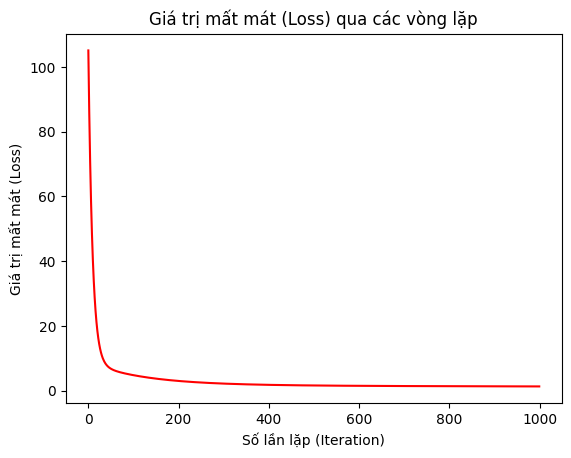

Tính giá trị mất mát với các giá trị còn lại: 
Giá trị hàm mất mát test: 2.5709360478207173


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
from google.colab import drive


# Tạo dữ liệu ngẫu nhiên cho hai biến x1 và x2
np.random.seed(42)  # Đặt seed để đảm bảo tính tái lập
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Database_ML_AI
!ls


data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

'''N = 500  # Số lượng điểm dữ liệu
X1 = 2 * np.random.rand(N, 1)  # Biến x1 với 500 điểm dữ liệu
X2 = 3 * np.random.rand(N, 1)  # Biến x2 với 500 điểm dữ liệu
y = np.random.randn(N,3) + 61 * X1 + 47 * X2 + np.random.randn(N, 1)  # Hàm hồi quy thực tế: y = 4 + 3*x1 + 2*x2 + nhiễu Gaussian
X = np.c_[X1,X2]
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)'''
M = 20
X = data[0:M, 0:3]
y = data[0:M, 3:4]
''' print("Gia tri X")
print(X)
print("Gia tri Y")
print(y)'''
# y = y / 1000
mini = np.min(X)
maxi = np.max(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)
N = X.shape[0]  # Số lượng điểm dữ liệu



# Ghép X1 và X2 thành ma trận Xbar và thêm bias (cột 1)
Xbar = np.c_[np.ones((N, 1)), X]  # Thêm bias vào dữ liệu

# Định nghĩa các hàm cần thiết

# Hàm gradient tính đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]  # Số lượng dữ liệu
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# Hàm tính giá trị hàm mất mát
def loss_function(XX,w,YY):
    N = XX.shape[0]
    # Thay đổi cách tính norm để tránh sử dụng SVD
    # Sử dụng np.sum và np.square để tính norm theo cách thủ công
    # Tránh sử dụng np.linalg.norm(..., 2) để giảm thiểu khả năng SVD không hội tụ
    return .5/N * np.sum(np.square(XX.dot(w) - YY))

def loss_function_norm(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(Xbar.dot(w) - y, 2)**2

# Hàm Gradient Descent with Momentum với danh sách lưu loss
# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss

# Hàm Gradient Descent thông thường với danh sách lưu loss
def gradient_descent(w_init, grad, loss_function, alpha, loop=1000, epsilon=1e-6):
    w = [w_init]  # Danh sách chứa các trọng số qua các vòng lặp
    loss_list = []  # Danh sách chứa giá trị hàm mất mát (loss)

    for i in range(loop):
        grad_current = grad(w[-1])  # Tính gradient tại trọng số hiện tại
        w_new = w[-1] - alpha * grad_current  # Cập nhật trọng số

        loss = loss_function(Xbar, w_new, y)  # Tính loss tại trọng số hiện tại
        loss_list.append(loss)  # Đẩy giá trị loss vào danh sách

        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad_current) / len(w_new) < epsilon:
            break

        # Thêm trọng số mới vào danh sách
        w.append(w_new)

    return w, i, loss_list  # Trả về danh sách các trọng số, số vòng lặp, và danh sách loss


# Khởi tạo các tham số cần thiết
# w_init = np.zeros((Xbar.shape[1], 1))  # Vector trọng số khởi tạo (w0, w1 và w2 đều bằng 0)
w_init = np.random.randn(Xbar.shape[1], 1) * 0.01

alpha = 0.05  # Tốc độ học
beta = 0.9  # Hệ số động lượng
loop = 1000  # Số vòng lặp tối đa

# Chạy thuật toán Gradient Descent with Momentum và lưu loss
w_momentum, num_iterations_momentum, loss_list = gradient_descent(w_init, grad, loss_function, alpha)

# In ra kết quả
print(f"Trọng số cuối cùng: {w_momentum[-1]}")  # In ra trọng số cuối cùng
print(f"Số vòng lặp thực hiện: {num_iterations_momentum}")
print(f"Giá trị hàm mất mát cuối cùng: {loss_list[-1]}")
# Biểu diễn giá trị loss qua các vòng lặp
plt.plot(loss_list, 'r-')
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Giá trị mất mát (Loss)')
plt.title('Giá trị mất mát (Loss) qua các vòng lặp')
plt.show()

# so sánh với
print("Tính giá trị mất mát với các giá trị còn lại: ")
loss_after = []
X_after = data[M:, 0:3]
y_after = data[M:, 3:4]
min_af = np.min(X_after)
max_af = np.max(X_after)
avgX = np.mean(X_after)
X_after = (X_after - avgX) / (max_af - min_af)
N_after = X_after.shape[0]
Xbar_af = np.c_[np.ones((N_after, 1)), X_after]
loss_after = loss_function(Xbar_af,w_momentum[-1],y_after)
print(f"Giá trị hàm mất mát test: {loss_after}")